In [11]:
import sklearn as sk
import sklearn.covariance as cov
import pandas as pd
import numpy as np
import ggplot as gg

train_original = pd.DataFrame.from_csv("cleaned_train.csv")
data = train_original.copy()

train = data.as_matrix()
names = data.columns

In [12]:
# Scale some features correctly
#data['OverallQual'] = train_original['OverallQual'].apply(lambda x:x**3)

# Drop features with low variance
import sklearn.feature_selection as sel

thredsh = sel.VarianceThreshold(threshold=0.003) # comparing with plots  0.003 seems to be a good threshold
thredsh.fit(train)
deselected = ~thredsh.get_support()
data = data.drop(names[deselected],axis=1)

# regenerate matrix
train = data.as_matrix()
names = data.columns

In [13]:
import sklearn.preprocessing as pre

# scale all
scaler = pre.RobustScaler()
train = scaler.fit_transform(train)

In [14]:
import sklearn.covariance as cov

lw = cov.LedoitWolf()
lw.fit(train)
cov_matrix = lw.covariance_

In [15]:
cor = np.corrcoef(cov_matrix)

relevance = cor[:,0]
sort = np.argsort(np.absolute(relevance))[::-1]
list(zip(relevance[sort],names[sort]))[:20]

[(1.0, 'SalePrice'),
 (-0.014074372448736617, 'EnclosedPorch'),
 (-0.012725643905124649, 'MiscVal'),
 (-0.0068432475732585684, 'BsmtFinSF2'),
 (-0.0068302645825528479, 'LowQualFinSF'),
 (-0.0059748399195204624, 'BsmtQual'),
 (-0.0059586993985782334, 'KitchenQual'),
 (-0.0058523858000828237, 'ExterQual'),
 (-0.0058362683342093567, 'GarageFinish'),
 (-0.0056929034232205081, 'BsmtExposure'),
 (-0.005674039878591307, 'OverallCond'),
 (-0.005535945104607057, 'Foundation CBlock'),
 (-0.0055256093756787016, 'MasVnrType None'),
 (-0.0055170883209201705, 'HeatingQC'),
 (-0.0054076325844473645, 'PavedDrive'),
 (-0.0053928111635244847, 'Functional'),
 (-0.0053465221027006026, 'Neighborhood NAmes'),
 (-0.0053218200944852925, 'GarageType Detchd'),
 (-0.0053034557965894622, 'Exterior1st MetalSd'),
 (-0.0052998017396319189, 'Exterior2nd MetalSd')]

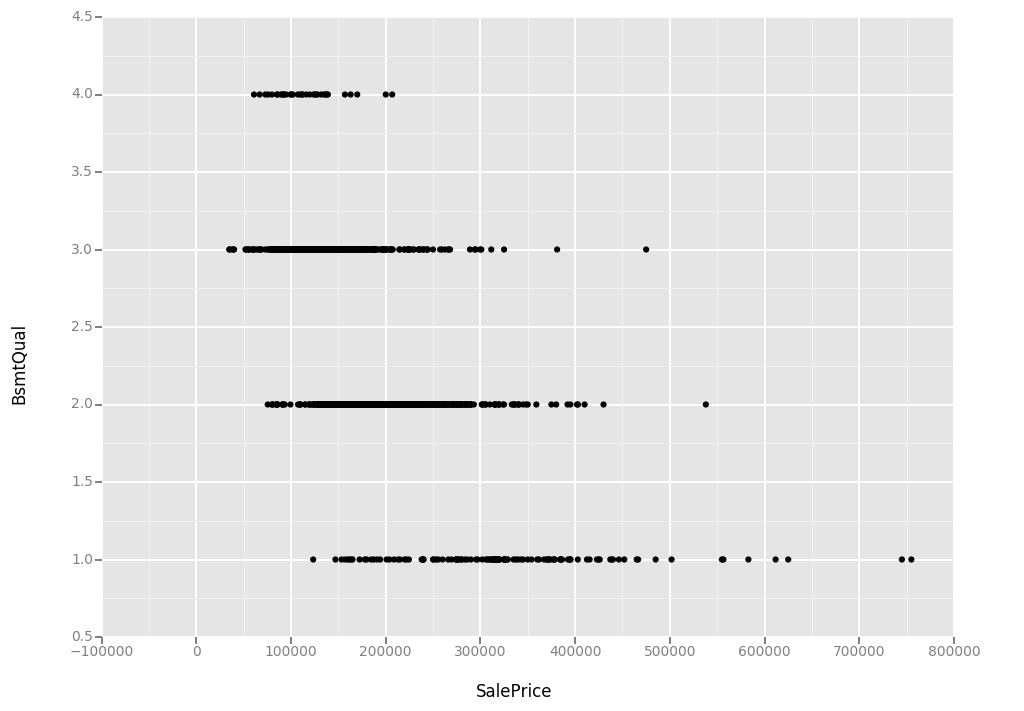

<ggplot: (-9223363304632331569)>

In [16]:
gg.ggplot(data,gg.aes(x='SalePrice',y='BsmtQual')) + gg.geom_point()

In [17]:
# Correlation Control:
# check whether correlation should be positiv or negativ

pos_cor = ['SalePrice','LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
           'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr',
           'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
           'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal','OverallQual',
           'OverallCond','GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'
          ]

neg_cor = ['Utilities','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2','HeatingQC',
          'KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond','GarageCond','PavedDrive',
           'PoolQC','Fence'
          ]

unsure_cor = ['BsmtExposure','BsmtUnfSF',  
                     'LowQualFinSF']

c = dict(zip(names,relevance))

for item in pos_cor:
    if c[item]<=0:
        print("Wrong correlation for",item,c[item])

for item in neg_cor:
    if c[item]>=0:
        print("Wrong correlation for",item,c[item])

Wrong correlation for LotFrontage -0.00464669849292
Wrong correlation for LotArea -0.00485334599148
Wrong correlation for YearBuilt -0.0043374121898
Wrong correlation for YearRemodAdd -0.00459265581941
Wrong correlation for MasVnrArea -0.00408375092057
Wrong correlation for BsmtFinSF1 -0.00471359790376
Wrong correlation for BsmtFinSF2 -0.00684324757326
Wrong correlation for TotalBsmtSF -0.00431628918364
Wrong correlation for 1stFlrSF -0.00443227780184
Wrong correlation for 2ndFlrSF -0.0048716222142
Wrong correlation for BedroomAbvGr -0.00498283946835
Wrong correlation for KitchenAbvGr -0.00521507373869
Wrong correlation for TotRmsAbvGrd -0.00460844451906
Wrong correlation for Fireplaces -0.00471354396074
Wrong correlation for GarageYrBlt -0.00447096439459
Wrong correlation for GarageCars -0.0041931396314
Wrong correlation for GarageArea -0.00414632859812
Wrong correlation for WoodDeckSF -0.0047242234059
Wrong correlation for OpenPorchSF -0.00455867702074
Wrong correlation for EnclosedP

KeyError: 'Utilities'

In [18]:
# Split the data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

labels = train[:,0]
features = train[:,1:]

x_train, x_test, y_train, y_test = train_test_split(features,labels,test_size=0.2)

In [25]:
from sklearn import ensemble


    #fitter = sk.linear_model.Ridge(alpha=alpha)
fitter = sk.svm.SVR(kernel="linear",cache_size=6000)


labels = train[:,0][:350]
features = train[:,1:][:350]
    
scores = cross_val_score(fitter,features,labels,cv=3,scoring='neg_mean_squared_error',n_jobs=3)
print("RMSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

RMSE: -0.23 (+/- 0.24)


In [55]:
from sklearn import ensemble

n = 1
alphas = np.logspace(-2,4,n)
scores = [0]*n

for i,alpha in enumerate(alphas):
    #fitter = sk.linear_model.Ridge(alpha=alpha)
    #fitter = sk.linear_model.Lasso(alpha=alpha) #sk.svm.SVR(kernel="linear")
    #fitter = ensemble.RandomForestRegressor()
    
    
    scores[i] = cross_val_score(fitter,features,labels,cv=4,scoring='neg_mean_squared_error',n_jobs=4).mean()
    print(alpha,scores[i])
    
print(max(scores))
gg.qplot(x=alphas,y=scores) + gg.scale_x_log()
    #print("RMSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

0.01 -0.821382335342
0.0206913808111 -0.82138233762
0.0428133239872 -0.821382342337
0.088586679041 -0.821382352093


KeyboardInterrupt: 

In [60]:
fitter = ensemble.GradientBoostingRegressor()
fitter.fit(features,labels)

to_predict = pd.DataFrame.from_csv("cleaned_test.csv")
# apply transformations
to_predict = to_predict.drop(train_original.columns[deselected],axis=1)
to_predict_matrix = to_predict.as_matrix()
to_predict_matrix = scaler.transform(to_predict_matrix)

In [61]:
features = to_predict_matrix[:,1:]
labels = fitter.predict(features)
prices = scaler.inverse_transform(np.insert(features,0,labels,axis=1))

In [62]:
to_predict['SalePrice'] = prices
to_predict[['SalePrice']].to_csv("submission.csv")